In [2]:
import math
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#Load values of teta and beta from "thirteen_fitting_failure_probability_data.xlsx"
teta = 1.532 #median of the lognormal distribution
beta = 0.101 #standard deviation of the lognormal distribution

In [4]:
# #Failure probability data from Baker et al. (2015)
# im = np.array([0.2, 0.3, 0.4, 0.6, 0.7, 0.8, 0.9, 1])
# number_of_analyses = np.array([40, 40, 40, 40, 40, 40, 40, 40])
# number_of_collapses = np.array([0, 0, 0, 4, 6, 13, 12, 16])

In [5]:
# #Failure probability data from Qeshta et al., 2021, https://doi.org/10.1080/15732479.2021.1892774
# im = np.array([4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.46])
# number_of_analyses = np.array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]) 
# number_of_collapses = np.array([0, 0, 0, 0, 0, 0, 1, 3, 7, 9, 10])

In [6]:
#Failure probability data from "twelve_arch_compressive_limit_state_equation.ipynb" 
# im = np.array([0.289, 0.578, 0.867, 1.156, 1.444, 1.733, 2.022, 2.311, 2.6])
# number_of_analyses = np.array([100_000, 100_000, 100_000, 100_000, 100_000, 100_000, 100_000, 100_000, 100_000])
# number_of_collapses = np.array([69, 69, 69, 259, 1880, 15286, 74760, 99995, 100_000])

In [7]:
%store -r pier_local_scour_depth
%store -r convergence_simulation_number
%store -r arch_compressive_failure_points_number

In [8]:
#Failure probability data from "twelve_arch_compressive_limit_state_equation.ipynb" and other stored values
im = np.array(pier_local_scour_depth[0])
number_of_analyses = np.ones(len(pier_local_scour_depth[0]))*convergence_simulation_number
number_of_collapses = np.array(arch_compressive_failure_points_number)

In [9]:
#https://numpy.org/doc/stable/reference/generated/numpy.divide.html
collapse_fractions = np.divide(number_of_collapses, number_of_analyses)
print(collapse_fractions)

[6.9000e-04 6.9000e-04 6.9000e-04 6.9000e-04 2.5900e-03 1.8800e-02
 1.5286e-01 7.4760e-01 9.9995e-01 1.0000e+00]


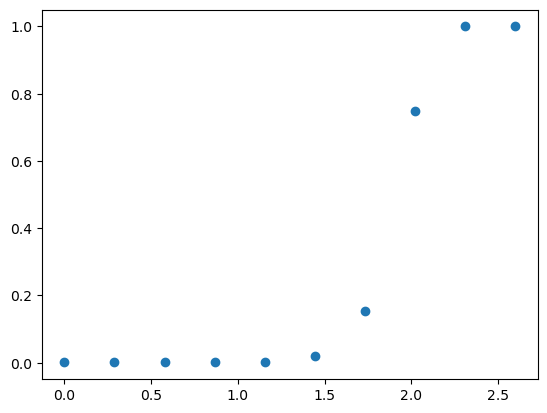

In [10]:
plt.scatter(im, collapse_fractions)

In [11]:
#https://www.omnicalculator.com/statistics/lognormal-distribution#lognormal-distribution-explained
#https://stackoverflow.com/questions/8870982/how-do-i-get-a-lognormal-distribution-in-python-with-mu-and-sigma
#https://stackoverflow.com/questions/46375553/standard-normal-distribution-in-python
lognormal_distribution = stats.norm(math.log(teta), beta)

In [12]:
im_l = np.log(im)
lognormal_cumulative_density_function = lognormal_distribution.cdf(im_l)

C:\Users\fn20944\AppData\Local\Temp\ipykernel_25736\1225524885.py:1: RuntimeWarning: divide by zero encountered in log
  im_l = np.log(im)


Text(0, 0.5, 'Annual probability of failure [-]')

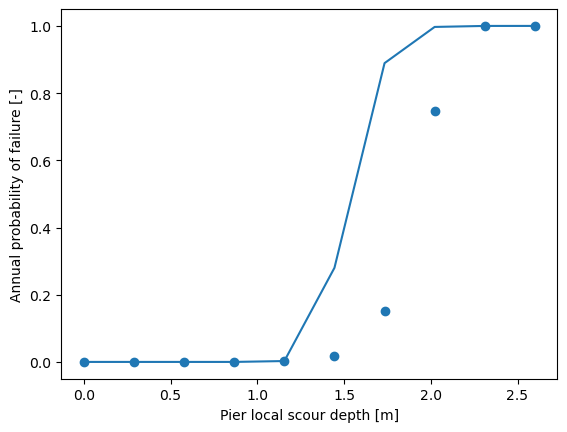

In [13]:
plt.scatter(im, collapse_fractions)
plt.plot(im, lognormal_cumulative_density_function)
plt.xlabel("Pier local scour depth [m]")
plt.ylabel("Annual probability of failure [-]")